### 1) Practice with Wiener filtering. Consider for example a Gaussian blurring (so you know exactly the H function) and play with different values of K for different types and levels of noise.

In [3]:
"""Parameters
----------
image : ndarray
    Input image data. Will be converted to float.
mode : str
    One of the following strings, selecting the type of noise to add:

    'gauss'     Gaussian-distributed additive noise.
    'poisson'   Poisson-distributed noise generated from the data.
    's&p'       Replaces random pixels with 0 or 1.
    'speckle'   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.
"""

import numpy as np
import os
import cv2

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    
    elif noise_typ == "s&p":
        
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.04
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    
    elif noise_typ == "poisson":
        
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    
    elif noise_typ =="speckle":
        
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

Wiener filter

The inverse filter based on the PSF (Point Spread Function), the prior regularisation (penalisation of high frequency) and the tradeoff between the data and prior adequacy. The regularization parameter must be hand tuned.

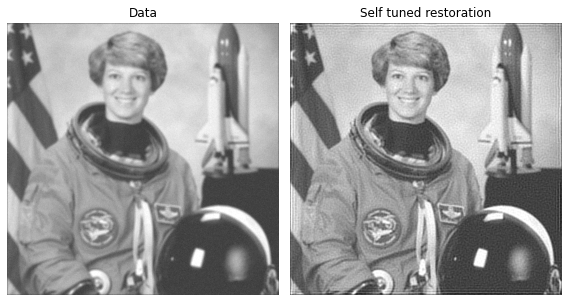

In [30]:
# link - https://scikit-image.org/docs/dev/auto_examples/filters/plot_restoration.html
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration

rng = np.random.default_rng()

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

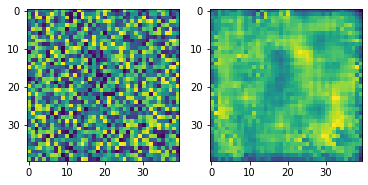

In [10]:
from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()
img = rng.random((40, 40))    #Create a random image
filtered_img = wiener(img, (5, 5))  #Filter the image
f, (plot1, plot2) = plt.subplots(1, 2)
plot1.imshow(img)
plot2.imshow(filtered_img)
plt.show()

"""
# convolve each channel with the kernel
for i in range(frame.shape[-1]):
    frame[:,:,i] = convolve2d(frame[:,:,i], psf, mode="same")

# add gaussian noise
frame += 0.1 * frame.std() * np.random.standard_normal(frame.shape)

# wiener deconvolution
fixed = np.zeros(frame.shape)
for i in range(frame.shape[-1]):
    fixed[:,:,i], _ = restoration.unsupervised_wiener(frame[:,:,i], psf)
"""

In [17]:
np.array(gauss).shape

(512, 512, 3)